<a href="https://colab.research.google.com/github/josephasal/cosmo_inference/blob/main/mcmc/run_mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install corner
!pip install SciencePlots
!pip install emcee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.8 MB/s eta 0:00:00


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import corner
import emcee
#Run the functions file to use
%run '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/mcmc_functions.ipynb'

#load in the data and assigning variables
filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/LOWZ+ESSENCE+SNLS.csv'

supernova_df = pd.read_csv(filepath)

#defining variables
redshift = supernova_df['Z']
distance_mod = supernova_df['MU']
err_distance_mod = supernova_df['MUERR']

Basic MCMC

In [29]:
# Running the basic mcmc i have

np.random.seed(69)
num_walkers = 10
n_steps = 10000
step_size = [0.01,0.01]
burn_in = 0.2

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.5<h<0.7
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.5,0.7)]
                for _ in range(num_walkers)]

samples = metropolis_hastings(log_likelihood, redshift, distance_mod, err_distance_mod, n_steps, initial_guess, step_size, burn_in, num_walkers)

MCMC carried out with 10000 steps, and acceptance ratio of each walker [0.2433 0.2399 0.2373 0.2364 0.2462 0.2398 0.2384 0.2451 0.2376 0.2405]


In [30]:
#get the omega and h chains
basic_omega = samples[:,:,0]
basic_h = samples[:,:,1]

#get average acceptance rate
avg_alpha_basic = avg_alpha
print(f'Average Acceptance rate = {avg_alpha_basic}')
#check for convergence
gr_basic_omega = gelman_rubin(basic_omega)
gr_basic_h = gelman_rubin(basic_h)

print(f'Convergence for omega = {gr_basic_omega}, h = {gr_basic_h}')


#calculate effective sample size
ess_basic_omega = eff_sample_size_multichain(adaptive_omega)
ess_basic_h = eff_sample_size_multichain(basic_h)

print(f'Effective sample size for omega = {ess_basic_omega}, h = {ess_basic_h}')

Average Acceptance rate = 0.44327000000000005
Convergence for omega = 1.0080999886691793, h = 1.0028909127497547
Effective sample size for omega = 7221.46417924134, h = 1567.955280550641


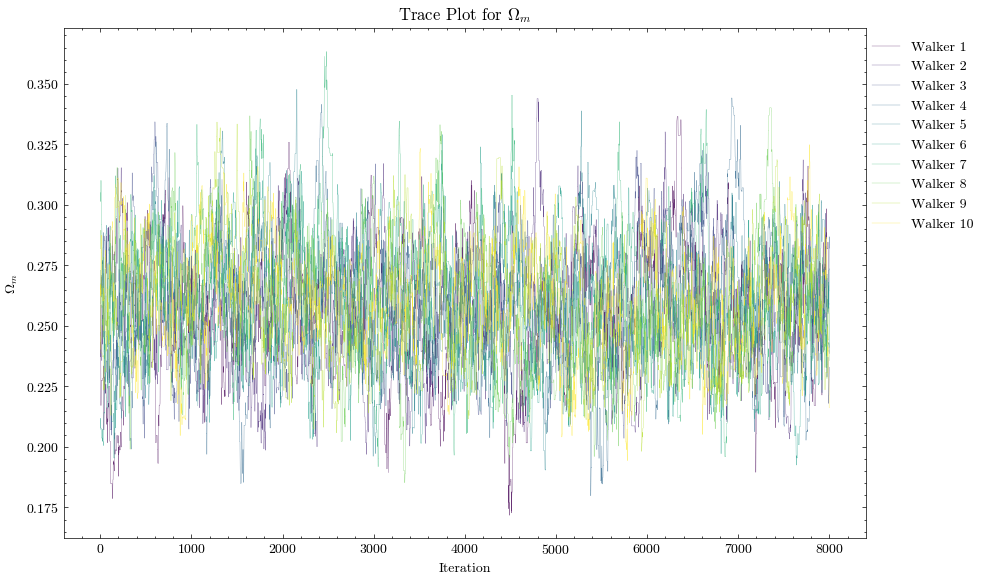

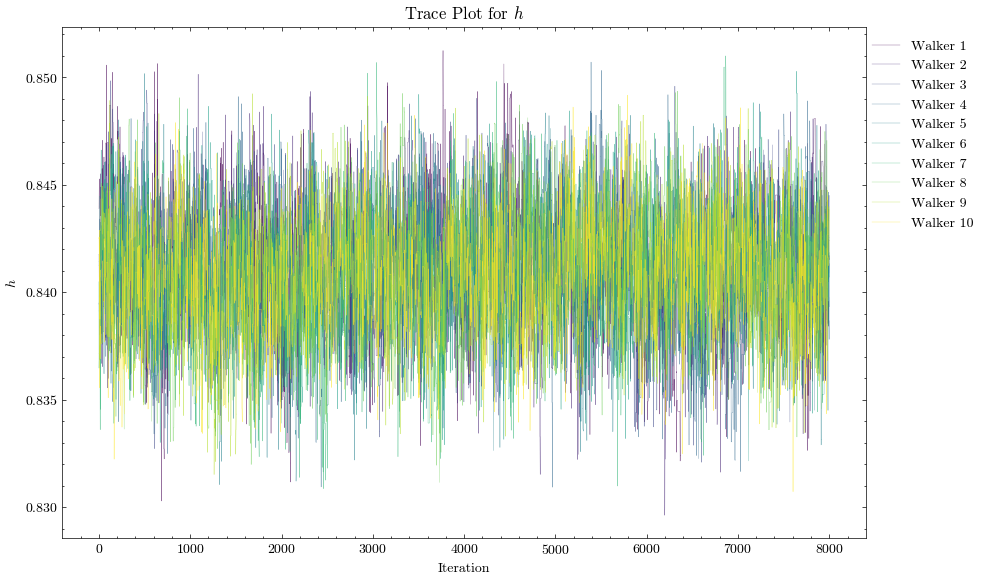

In [32]:
#plotting basic mcmc
n_steps, n_walkers = basic_omega.shape

#viridis the goat
colors = plt.cm.viridis(np.linspace(0, 1, n_walkers))

# Trace plot for Omega_m
plt.figure(figsize=(10,6))
for i in range(n_walkers):
    plt.plot(basic_omega[:, i], label=f'Walker {i+1}', color=colors[i], alpha=0.8, linewidth=0.25)
plt.xlabel('Iteration')
plt.ylabel('$\\Omega_{m}$')
plt.title('Trace Plot for $\\Omega_{m}$')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.savefig('trace_plot_omega.pdf', format='pdf', bbox_inches='tight')  # Save as PDF
plt.show()

# Trace plot for h
plt.figure(figsize=(10,6))
for i in range(n_walkers):
    plt.plot(basic_h[:, i], label=f'Walker {i+1}', color=colors[i], alpha=0.8, linewidth=0.25)
plt.xlabel('Iteration')
plt.ylabel('$h$')
plt.title('Trace Plot for $h$')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

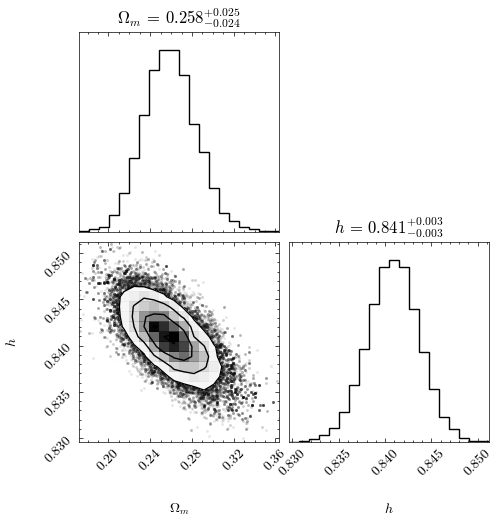

In [33]:
#corner plot for basic

flattened_samples = samples.reshape(-1, samples.shape[-1])
labels = [r'$\Omega_m$', r'$h$']

# Create the corner plot
corner.corner(flattened_samples, labels=labels, show_titles = True, title_fmt='.3f')
plt.show()

In [8]:
#Running the adaptive mcmc

%time

np.random.seed(69)
num_walkers = 10

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.5<h<0.7
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.5,0.7)]
                for _ in range(num_walkers)]

n_steps = 10000
step_size = [0.01,0.01]
update_interval = 100
learning_rate = 0.1
target_alpha = 0.4
burn_in = 0.2

#running mcmc
adaptive_samples, avg_alpha, cov_hist, step_hist = adaptive_metropolis_hastings(log_likelihood,
                                                                         redshift,
                                                                         distance_mod,
                                                                         err_distance_mod,
                                                                         n_steps,
                                                                         initial_guess, step_size,
                                                                         burn_in, num_walkers, update_interval, target_alpha, learning_rate)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
After 100 iteration alpha = 0.41600000000000004, new step size = [0.03217436025293804, 0.04239001055103086]
After 200 iteration alpha = 0.071, new step size = [0.035403108341831746, 0.03797432788273404]
After 300 iteration alpha = 0.051, new step size = [0.03302569764440952, 0.03398563859358971]
After 400 iteration alpha = 0.055999999999999994, new step size = [0.030760259097207643, 0.03041466522401422]
After 500 iteration alpha = 0.051, new step size = [0.029383588828099057, 0.027226916361992187]
After 600 iteration alpha = 0.061, new step size = [0.028302478978124684, 0.02438162661484186]
After 700 iteration alpha = 0.098, new step size = [0.027369924190464814, 0.021838051579430695]
After 800 iteration alpha = 0.094, new step size = [0.026678858360679028, 0.0195782819122806]
After 900 iteration alpha = 0.11, new step size = [0.02591257920188145, 0.017574025056947093]
After 1000 iteration alpha = 0.11900000000000001, new 

In [9]:
#get the omega and h chains
adaptive_omega = samples[:,:,0]
adaptive_h = samples[:,:,1]

#get average acceptance rate
avg_alpha_adaptive = avg_alpha
print(f'Average Acceptance rate = {avg_alpha_adaptive}')
#check for convergence
gr_adaptive_omega = gelman_rubin(adaptive_omega)
gr_adaptive_h = gelman_rubin(adaptive_h)

print(f'Convergence for omega = {gr_adaptive_omega}, h = {gr_adaptive_h}')


#calculate effective sample size
ess_adaptive_omega = eff_sample_size_multichain(adaptive_omega)
ess_adaptive_h = eff_sample_size_multichain(adaptive_h)

print(f'Effective sample size for omega = {ess_adaptive_omega}, h = {ess_adaptive_h}')

Average Acceptance rate = 0.44327000000000005
Convergence for omega = 1.0010434450263694, h = 1.0004295001034473
Effective sample size for omega = 7221.46417924134, h = 8311.066744828431


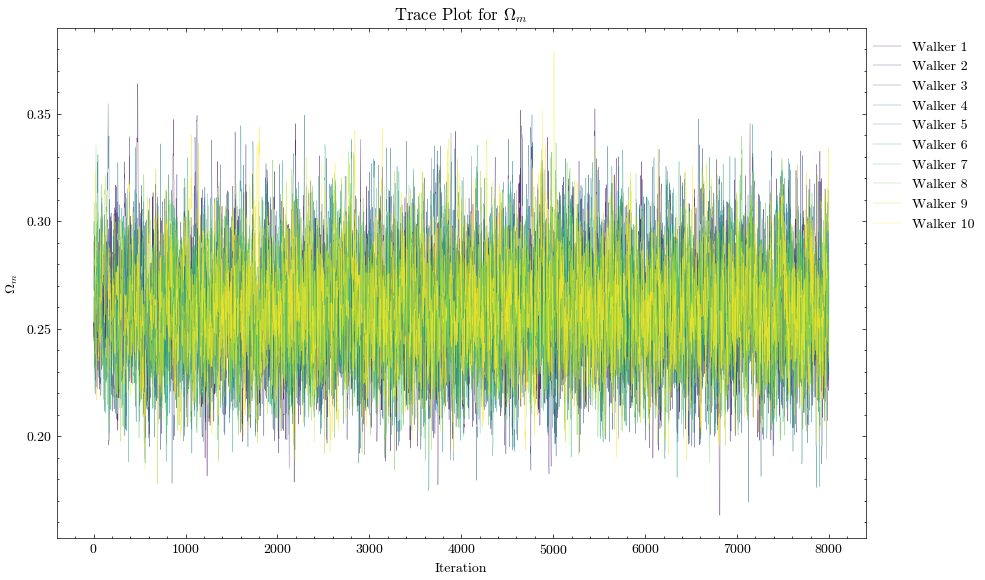

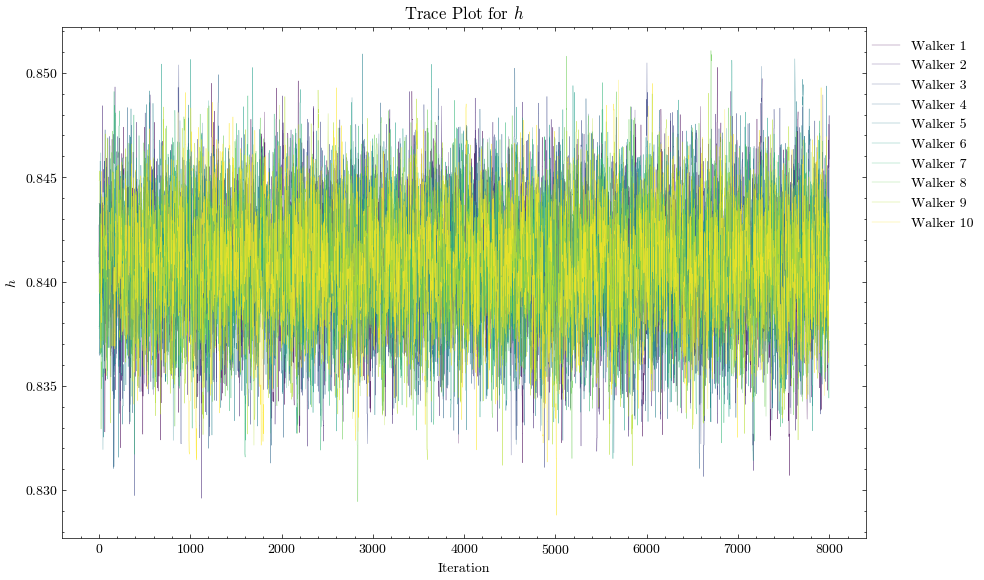

In [12]:
plt.style.use(['science', 'no-latex'])

n_steps, n_walkers = adaptive_omega.shape

#viridis the goat
colors = plt.cm.viridis(np.linspace(0, 1, n_walkers))

# Trace plot for Omega_m
plt.figure(figsize=(10,6))
for i in range(n_walkers):
    plt.plot(adaptive_omega[:, i], label=f'Walker {i+1}', color=colors[i], alpha=0.8, linewidth=0.25)
plt.xlabel('Iteration')
plt.ylabel('$\\Omega_{m}$')
plt.title('Trace Plot for $\\Omega_{m}$')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.savefig('trace_plot_omega.pdf', format='pdf', bbox_inches='tight')  # Save as PDF
plt.show()

# Trace plot for h
plt.figure(figsize=(10,6))
for i in range(n_walkers):
    plt.plot(adaptive_h[:, i], label=f'Walker {i+1}', color=colors[i], alpha=0.8, linewidth=0.25)
plt.xlabel('Iteration')
plt.ylabel('$h$')
plt.title('Trace Plot for $h$')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

Flattened samples shape: (80000, 2)


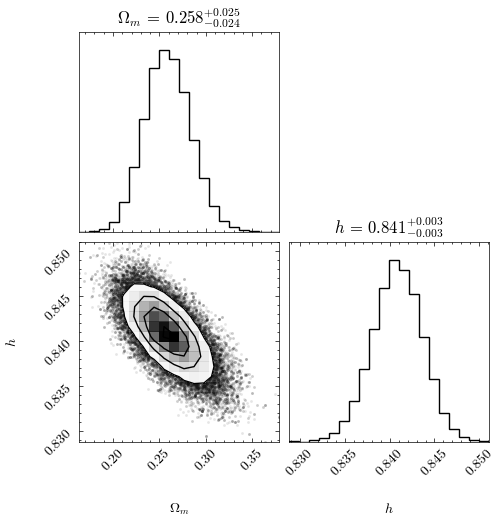

In [16]:
#have to reshape the arrays into 2d for corner

flattened_samples = samples.reshape(-1, samples.shape[-1])
print("Flattened samples shape:", flattened_samples.shape)

# Define parameter labels
labels = [r'$\Omega_m$', r'$h$']

# Create the corner plot
corner.corner(flattened_samples, labels=labels, show_titles = True, title_fmt='.3f')
plt.show()

# Comparing my adaptive mcmc to emcee

In [21]:
#have to define the log posterior, just adding the prior and likelihood

def log_posterior(theta, z, mu_obs, sigma_mu):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    mu_model = calculate_distance_modulus(z, theta[0], theta[1])
    return lp + log_likelihood(mu_obs, mu_model, sigma_mu)



#Running emcee with same parameters i used for adaptive mcmc
np.random.seed(69)
num_walkers = 10
ndim = 2 #2 dimensional for omega m and h
n_steps = 10000

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.5<h<0.7
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.5,0.7)]
                for _ in range(num_walkers)]


#creating the sampler using emcee
sampler = emcee.EnsembleSampler(num_walkers, ndim, log_posterior, args = (redshift, distance_mod, err_distance_mod))

#run the mcmc
sampler.run_mcmc(initial_guess, n_steps, progress = True)

#get rid of burn in samples (20%)
burn_in = int(0.2 * n_steps)
samples = sampler.get_chain(discard = burn_in, flat = True)

#mean acceptance rate
emcee_alpha = np.mean((sampler.acceptance_fraction))
print(f'emcee alpha = {emcee_alpha}')



100%|██████████| 10000/10000 [03:24<00:00, 48.79it/s]

emcee alpha = 0.7167


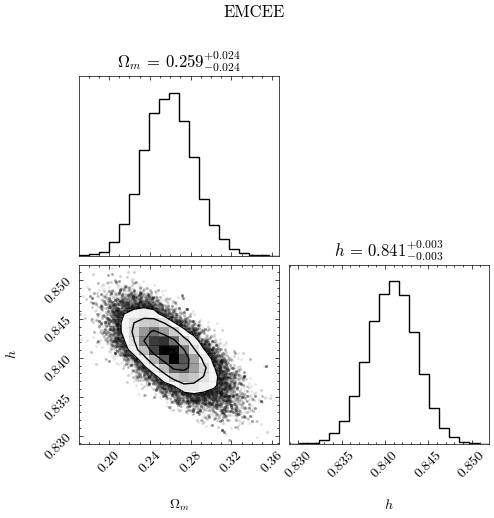

In [27]:

labels = [r"$\Omega_m$", r"$h$"]

# Create the corner plot
fig = corner.corner(samples, labels=labels, show_titles=True, title_fmt=".3f")

# Display the plot
fig.suptitle('EMCEE')
plt.subplots_adjust(top=0.85)
plt.show()
